In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy import stats

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
def normalize(X):
    """
    """
    for i in range(0, np.shape(X)[1]):
        X[:, i] = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])

In [4]:
def distance(x, X):
    """
    """
    dist = 0
    for i in range(0, np.shape(X)[1]):
        dist = dist + np.square(x[i] - X[:, i])
    dist = np.sqrt(dist)
    return dist

In [5]:
def knn(X_train, Y_train, X_test, k):
    """
    """
    Y_test = np.zeros(np.shape(X_test)[0])
    for i in range(0, np.shape(X_test)[0]):
        dist = distance(X_test[i, :], X_train)
        closest = np.argsort(dist)[0:k]
        neighbors = Y_train[closest]
        Y_test[i] = stats.mode(neighbors)[0][0]
    return Y_test

In [6]:
def K_CV(X, Y, K, k):
    index = np.random.uniform(size = np.shape(X)[0])
    true_pred = np.zeros(K)
    for i in range(0, K):
        index_train = np.where((index < i / K) | (index >= (i + 1) / K))[0]
        index_test = np.where((index >= i / K) & (index < (i + 1) / K))[0]
        X_train = X[index_train, :]
        X_test = X[index_test, :]
        Y_train = Y[index_train]
        Y_test = Y[index_test]
        predict = knn(X_train, Y_train, X_test, k)
        true_pred[i] = np.sum(Y_test == predict) / np.shape(X_test)[0]
    return np.mean(true_pred)

In [7]:
def N_CV(X, Y, N, K, k):
    true_pred = np.zeros(N)
    for i in range(1, N):
        true_pred[i] = K_CV(X, Y, K, k)
    return np.mean(true_pred)

In [8]:
K = 10
N = 100
true_pred = np.zeros(20)
for k in range(1, 21):
    true_pred[k - 1] = N_CV(X, Y, N, K, k)

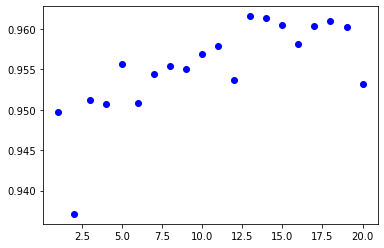

In [9]:
plt.plot(np.arange(1, 21), true_pred, 'bo')